# Sklearn and outlier detection
- Univariate variable extremely high value can be used as a measure of out lier
- A multi variate out lier can be characterized by an unusual combination of values.
    + We can use dimensionality reduction techniques where new features are linear/no-linear combinations of original features.
    + can do 2d or 3d plot to inspect isolated cluster.

# Some other option in sklearn
## Distribution based
- Fits a distribution to signal outliers. 
    + Covariance elliptic class fits a multi variate gaussian.
        * need to set contamination parameter(proportion of the outlier present in your data set).
## Novelty detection based

 - One class svm or isolation forest. It detects if a data point is a novelty or not.

# Let's see Covariance elliptic class in practice

In [1]:
from sklearn.datasets import make_blobs
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



In [3]:
blob = make_blobs(n_samples=100, n_features=2, centers=1, cluster_std=1.0)

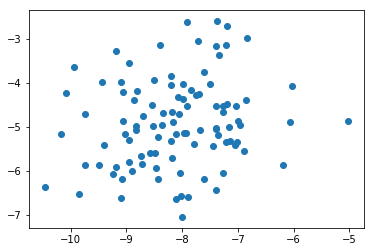

In [4]:
plt.scatter(blob[0][:,0], blob[0][:,1])

In [6]:
from sklearn.covariance import EllipticEnvelope

In [7]:
cov_est= EllipticEnvelope(contamination=.1)

In [8]:
cov_est.fit(blob[0])

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [9]:
predict = cov_est.predict(blob[0])

In [10]:
predict

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1])

In [11]:
detection_df = pd.DataFrame(blob[0], columns = ['x', 'y'])
detection_df.head()

,x,y
0,-7.137950,-5.313670
1,-9.402176,-5.421133
2,-8.196584,-5.329521
3,-8.947553,-3.545932
4,-6.842851,-2.985240


In [12]:
detection_df['is_outlier'] =predict
detection_df.head()

,x,y,is_outlier
0,-7.137950,-5.313670,1
1,-9.402176,-5.421133,1
2,-8.196584,-5.329521,1
3,-8.947553,-3.545932,1
4,-6.842851,-2.985240,-1


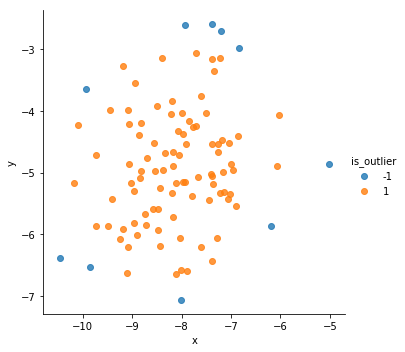

In [13]:
sns.lmplot("x", "y", fit_reg=False, hue="is_outlier", data=detection_df)

In [14]:
from sklearn import datasets
house = datasets.california_housing.fetch_california_housing()

In [15]:
cali_house_df = pd.DataFrame(house.data, columns=house.feature_names)
# in units of 100,000.
cali_house_df['avg_house_val'] = house.target
cali_house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,avg_house_val
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [17]:
x = cali_house_df.drop('avg_house_val', axis=1)


In [18]:
#sc =RobustScaler()
sc= StandardScaler()
sc.fit(x)

x_rsc = sc.transform(x)


In [19]:
from sklearn.decomposition import PCA 


In [20]:
pca = PCA(n_components=2)
pca.fit(x_rsc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
x_rsc.shape

(20640, 8)

In [22]:
# Project the data into pca basis
X_pca = pca.transform(x_rsc)
X_pca.shape

(20640, 2)

In [23]:
pca.explained_variance_ratio_

array([0.25336868, 0.23516245])

In [24]:
cov_est= EllipticEnvelope(contamination=.0001, assume_centered=True)

In [25]:
cov_est.fit(X_pca)

EllipticEnvelope(assume_centered=True, contamination=0.0001,
         random_state=None, store_precision=True, support_fraction=None)

In [26]:
predict = cov_est.predict(X_pca)

In [27]:
cali_pca_df= pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
cali_pca_df['is_outlier'] = predict
cali_pca_df.head()

,PCA1,PCA2,is_outlier
0,1.882704,-0.503362,1
1,1.371120,-0.121406,1
2,2.086868,-0.501136,1
3,1.575801,-1.239495,1
4,1.591206,-1.345264,1


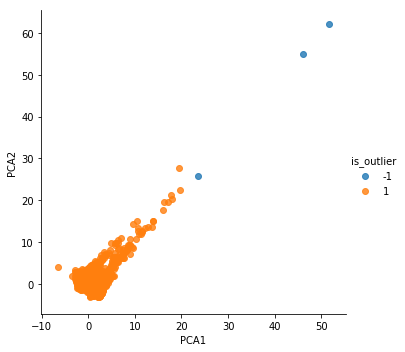

In [28]:
sns.lmplot("PCA1", "PCA2", fit_reg=False, hue="is_outlier", data=cali_pca_df)

Elliptic envelope is a parametric method.
- It fits a multivariate guassian.
- It is a strong assumption.

One class SVM is a better choice as it learn from data itself.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html

In [29]:
from sklearn.svm import OneClassSVM

In [30]:
pca= PCA(n_components=.95)

In [31]:
X_pca = pca.fit_transform(x_rsc)

In [32]:
X_pca.shape

(20640, 6)

In [34]:
outlier_frac= 0.0001

In [36]:
nu = 0.95*outlier_frac + 0.05

In [37]:
svm_detection = OneClassSVM(kernel='rbf', degree=3, gamma=1.0/x_rsc.shape[0], nu= nu)

In [38]:
predict = svm_detection.fit_predict(X_pca)

In [39]:
cali_pca_df= pd.DataFrame(X_pca, columns=['PCA'+str(i) for i in range(1, X_pca.shape[1] +1)])
cali_pca_df['is_outlier'] = predict
cali_pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,is_outlier
0,1.882704,-0.503362,-0.314134,-2.555093,0.128040,0.485177,1
1,1.371120,-0.121406,1.905258,-1.872984,-0.267430,0.605123,1
2,2.086868,-0.501136,-0.937245,-2.100133,0.370032,1.158676,1
3,1.575801,-1.239495,-1.025957,-1.286721,0.318956,0.977902,1
4,1.591206,-1.345264,-1.249171,-0.450778,0.293612,0.865664,1


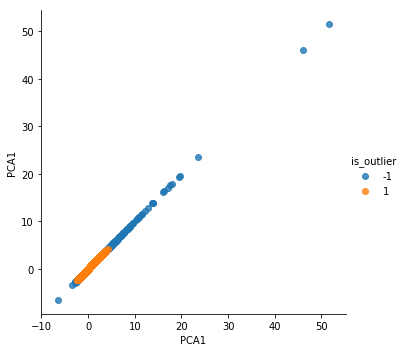

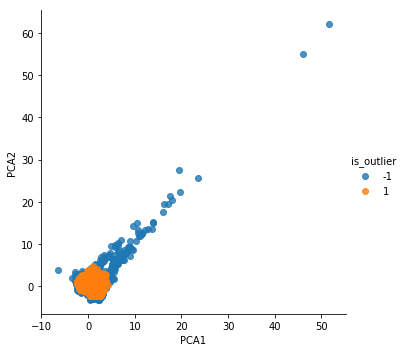

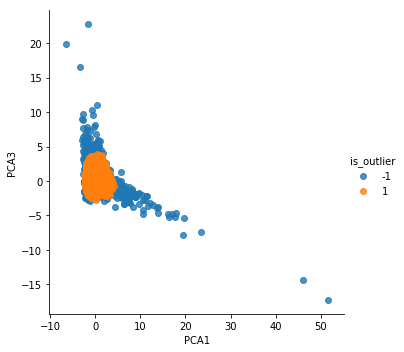

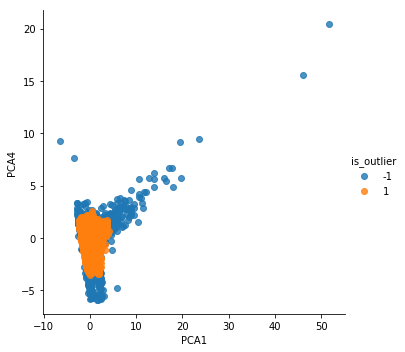

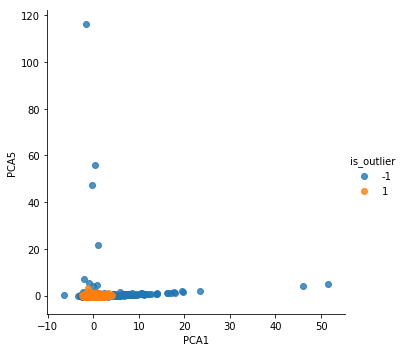

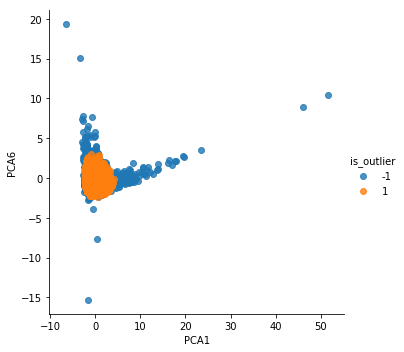

In [40]:
for i in range(1, X_pca.shape[1] +1):
    sns.lmplot("PCA1", "PCA"+str(i), fit_reg=False, hue="is_outlier", data=cali_pca_df)
    

Other methods
- Isolation Forest
https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html

# Validating the model

When we build machine learning/ data system we need a way to measure how well the system if performing.
Type of validation metric will depend on 

- classification
    + Binary
    + Multi class
- Regression

- Clustering

Check this page of 

https://github.com/benhamner  Ben Hamner Co-founder and CTO of Kaggle.

# binary classification

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()

In [42]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
data.data, data.target, test_size=0.3, random_state=12)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(X_train, y_train)

/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
y_test_pred = lr.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
print(lr.score(X_test, y_test))
print(accuracy_score(y_test, y_test_pred))


0.9415204678362573
0.9415204678362573


is this the whole story

In [49]:
cm = confusion_matrix(y_test, y_test_pred)

In [50]:
cm

array([[ 56,   8],
       [  2, 105]])

Text(33.0, 0.5, 'True class')

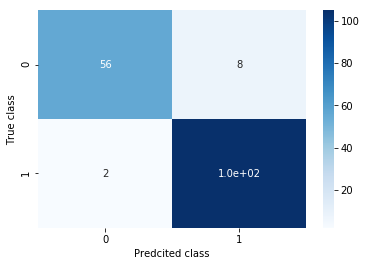

In [51]:
ax= sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)

ax.set_xlabel('Predcited class')
ax.set_ylabel('True class')

precision= $\frac{TP}{TP+FP}$ among the predicted positive how may are actually positive

recall = $\frac{TP}{TP+FN}$ also called true positive rate, sensitivity

In [52]:
precision_score(y_test, y_test_pred)

0.9292035398230089

In [53]:
recall_score(y_test, y_test_pred)

0.9813084112149533

In [54]:
f1_score(y_test, y_test_pred)

0.9545454545454545

# Multi class classification

When we want to classify data into more than two classes.
- Classify images into different categories.
    + https://www.cs.toronto.edu/~kriz/cifar.html
    + Sentiment classification of tweets, reviews etc

In [57]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le= LabelEncoder()

In [61]:
iris_df['class'] = le.fit_transform(iris_df['species'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,class
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [63]:
iris_df.drop(labels=['species'], inplace=True, axis=1)


KeyError: "['species'] not found in axis"

In [64]:
iris_df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,class
73,6.1,2.8,4.7,1.2,1
61,5.9,3.0,4.2,1.5,1
70,5.9,3.2,4.8,1.8,1
65,6.7,3.1,4.4,1.4,1
50,7.0,3.2,4.7,1.4,1
7,5.0,3.4,1.5,0.2,0
138,6.0,3.0,4.8,1.8,2
4,5.0,3.6,1.4,0.2,0
100,6.3,3.3,6.0,2.5,2
134,6.1,2.6,5.6,1.4,2


In [66]:
X_train_df, X_test_df = train_test_split(iris_df, test_size= .3, random_state=3)

In [67]:
X_train = X_train_df.drop(labels=['class'], axis=1)
y_train = X_train_df['class']
X_test = X_test_df.drop(labels=['class'], axis=1)
y_test = X_test_df['class']

In [70]:
multi_le= LogisticRegression(multi_class='multinomial', solver= 'lbfgs')

In [71]:
multi_le.fit(X_train, y_train)

/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
y_pred = multi_le.predict(X_test)

In [73]:
confusion_matrix(y_test, y_pred)

array([[17,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 14]])

In [76]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [79]:
print(classification_report(y_test, y_pred,target_names = le.classes_ ))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.93      0.96        14
   virginica       0.93      1.00      0.97        14

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Will start with Regression measures next time.



<center> <font size ="6">Thank you </font> </center>
 